Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Viktor Penchev"
STUDENTID = "230966576"

---

# MTH765P - Coursework 3
This is a template notebook for the third coursework assignment for MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Note that you may add other cells.
Failure to comply may result in unexpected errors that can lead to mark deductions. **Please submit only this file, without changing its name to QMPlus.**


##### DO NOT FORGET TO REMOVE THE LINE  _raise NotImplementedError()_ after you answer the question.

Author: Primoz Skraba


As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1
---------
---------
 
Linear models and residuals

--------
--------

Run the next cell to load the first dataset.

--------




In [3]:
X = pd.read_csv('data.csv',sep=' ')
X.head()

,x,y
0,-1.167390,-40.099714
1,-1.082710,-19.151187
2,-1.063447,-16.397238
3,-1.061148,-11.336125
4,-0.993360,-19.188918


----

a.) **(2 points)** Use _numpy.polyfit()_ to fit a linear model to the data, storing the parameters into variables called _m_ and _b_ respectively for the slope and y-intercept. 

----

In [4]:
# YOUR CODE HERE
coefs = np.polyfit(X['x'], X['y'], 1)
m = coefs[0]
b = coefs[1]

----

b.) **(5 points)** Compute the residual of the data with respect to the model and store them in a variable called _res_

----

In [23]:
# YOUR CODE HERE
# Calculate the predicted values
y_pred = b + X['x'] * m

# Calculate the residuals
res = X['y'] - y_pred

----

c.) **(4 points)** Plot an unnormalised histogram of the residuals with 30 bins

----

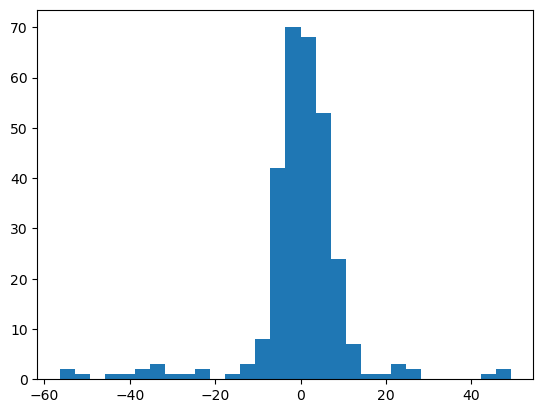

In [8]:
# YOUR CODE HERE
plt.hist(res, bins=30);

----

d.) **(4 points)** Is the linear model a good fit? (one or two sentences)

----

The residuals of the model are grouped around 0, with not many values outside [-10, 10]. This suggests that the linear model is a good fit as the residuals seem to be independently distributed around 0. The plot testifies that our model extracted most of the information from the data and what is left in the residuals is just noise.

----

e.) **(8 points)** Complete the function below to compute hinges of the input x, which should be set at the 30th and 70th quantile.

----

In [9]:
def hinges(x):
# YOUR CODE HERE
    lower = np.percentile(x, 30)
    upper = np.percentile(x, 70)
    return lower,upper

----

f.) **(2 points)** Use the above function to compute the inner fences of the residuals. Store the results in the variables _lower_fence_ and _upper_fence_ respectively.

----

In [24]:
# YOUR CODE HERE
lower, upper = hinges(res)
step = 1.5 * (upper - lower)
lower_fence = lower - step
upper_fence = upper + step

----

g.) **(3 points)** Create a new Dataframe called _Y_ with all the values corresponding to residuals which are beyond the inner fences removed.

----

In [11]:
# YOUR CODE HERE
Y = pd.DataFrame(X)
Y = Y[res.apply(lambda x: True if x >= lower_fence and x <= upper_fence else False)]

In [12]:
## Leave this cell it prints out the resulting dataframe
display(Y)

,x,y
1,-1.082710,-19.151187
2,-1.063447,-16.397238
3,-1.061148,-11.336125
4,-0.993360,-19.188918
5,-0.990390,-17.154749
...,...,...
293,0.993728,1.399987
294,0.999342,-6.721107
297,1.038887,-0.327475
298,1.081022,9.416868


----

h.) **(3 points)** Fit a new linear model and plot the  outliers as red points, the remainder of the points (non-outliers) as blue stars (\*), the original model as a black line and the new model shown as a green line. Store the new model parameters in the variables _m\_new_ and _b\_new_.

----

Text(0.5, 1.0, 'Linear regression with outliers removed')

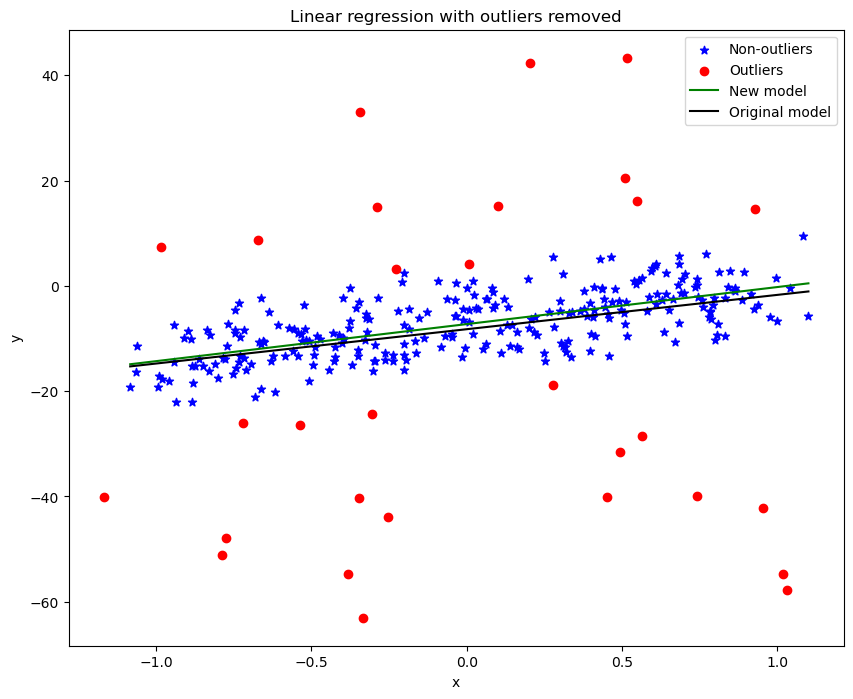

In [22]:
# YOUR CODE HERE
m_new, b_new = np.polyfit(Y['x'], Y['y'], 1)

outliers = pd.DataFrame(X)
outliers = outliers[res.apply(lambda x: True if x < lower_fence or x > upper_fence else False)]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(Y['x'], Y['y'], c='b', marker='*', label='Non-outliers')
ax.scatter(outliers['x'], outliers['y'], c='r', label='Outliers')
ax.plot(Y['x'], m_new*Y['x'] + b_new, c='g', label='New model')
ax.plot(Y['x'], m*Y['x'] + b, c='k', label='Original model')
ax.legend(loc='best')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_title('Linear regression with outliers removed')

----

i.) **(4 points)** Is what you did above different from computing (and filtering) the outliers on the original data? If so, describe how, otherwise explain why they are the same. (a few sentences)

----

The two methods are different. If we filtered the outliers only based on the original data, we would remove all points outside the outer fences. This approach is fine, but it assumes the mean of Y is independent of X. The linear models show us that Y is indeed dependent on X, so filtering the original data directly would potentially cut off some points that currently aren't outliers, while allowing some outliers to remain. The method we have used is better as the filtering takes into account the dependence of Y on X.

### Question  2

The next dataset is on the sales of video games. 

---------
---------

Use pandas to read in the file **vgsales.csv** into a dataframe called _games_



In [14]:
games = pd.read_csv('vgsales.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



 ----
 
a.) **(3 points)** Find answers to the following questions about the dataframe.
- How many genres are there? Store the answer in a variable called _num_genres_. 
- How many publishers are there? Store the answer in a variable _num_publishers_.
- How many platforms are there? Store the answer in a variable _num_platforms_.

----


In [15]:
# YOUR CODE HERE
num_genres = games['Genre'].nunique()
num_publishers = games['Publisher'].nunique()
num_platforms = games['Platform'].nunique()

----

b.) **(4 points)** Create a box-and-whisker plot of Global Sales by genre.

----

<Axes: title={'center': 'Global_Sales'}, xlabel='Genre'>

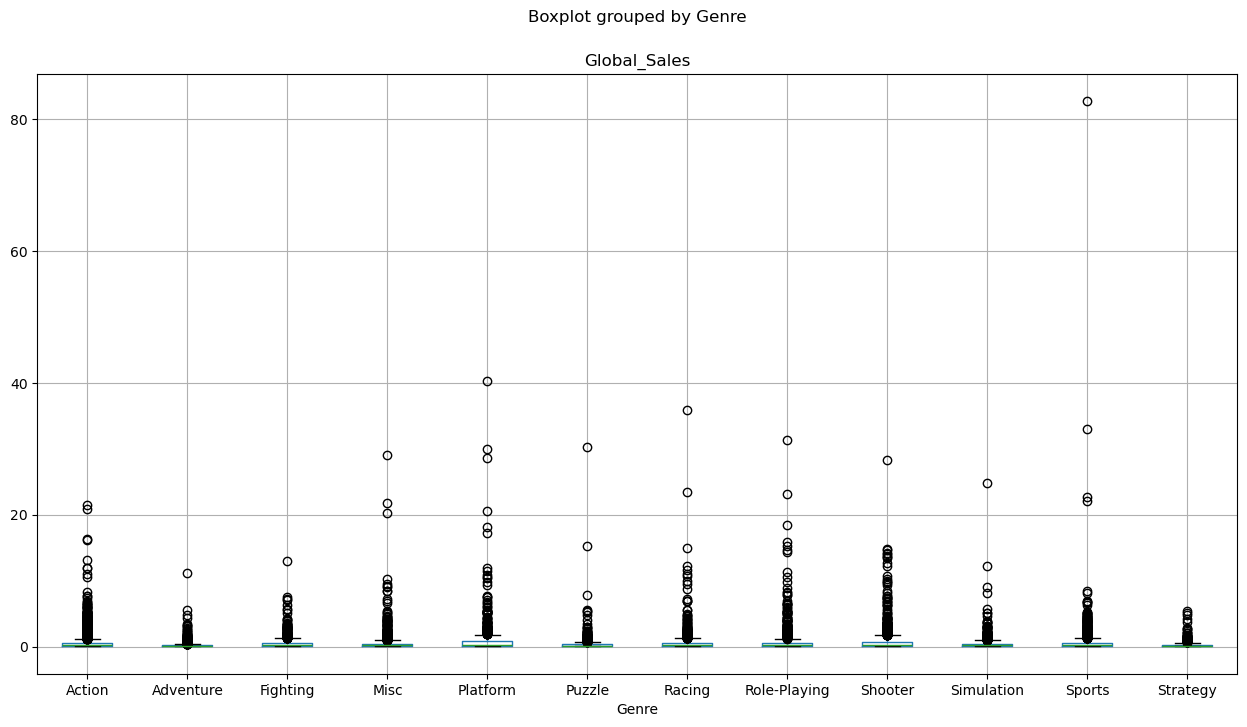

In [16]:
# YOUR CODE HERE
games.boxplot(column='Global_Sales', by='Genre', figsize=(15, 8))

----

c.) **(10 points)** Find the upper outer fence thresholds for each genre (assuming hinges at the 25th and 75th percentile). Store them in a dictionary {genre:upper outer fence} called ufence.

---

In [18]:
# YOUR CODE HERE
hinges = lambda x: (np.percentile(x, 25), np.percentile(x, 75))
ufence = {}

for genre in games['Genre'].unique():
    genre_sales = games[games['Genre'] == genre]['Global_Sales']
    lower_hinge, upper_hinge = hinges(genre_sales)
    step = 1.5 * (upper_hinge - lower_hinge)
    upper_outer = 2 * step + upper_hinge
    ufence[genre] = upper_outer

----

d.) **(4 points)** Plot the unnormalised histogram with 20 bins for all sports games whose Global sales which are beyond the outer fence.


----


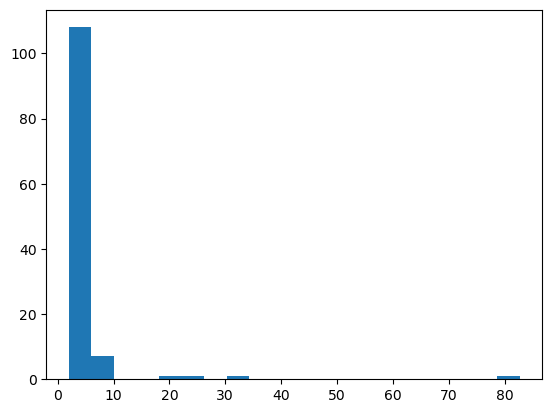

In [19]:
# YOUR CODE HERE
outliers = games.loc[(games['Genre'] == 'Sports') & (games['Global_Sales'] > ufence['Sports'])]
plt.hist(outliers['Global_Sales'], bins=20);

---- 
e.) **(4 points)** If these are successful games - what can you say about the maximum versus the typical successful game? What are the problems with using the average (overall or just the succesful games).

---

All of the successful games have global sales outside the upper outer fence. From the plot we see that most successful games fall just outside the upper outer fence, with only a few outliers which sold significantly more. The problem with using the average is that it is sensitive to outliers, so it would be significantly higher than the typical successful game because of the outliers. This would lead to overestimating the sales of a typical successful game.

----

f.) **(10 points)** Create a plot of the difference between North American Sales and EU Sales with a line for the following platforms per year.
- 2600, NES, SNES, GEN, N64, GC, WII, PS, PS2, PS3, PS4, X360, XB, XOne

----


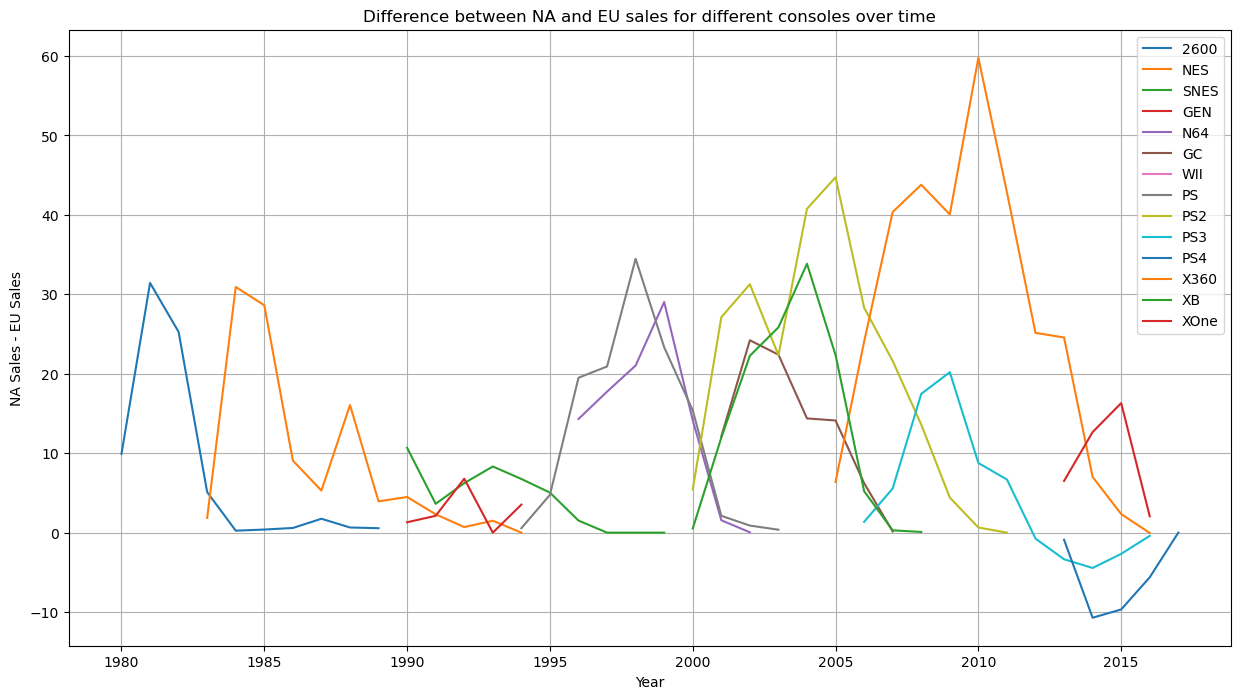

In [21]:
# YOUR CODE HERE
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
for console in ['2600', 'NES', 'SNES', 'GEN', 'N64', 'GC', 'WII', 'PS', 'PS2', 'PS3', 'PS4', 'X360', 'XB', 'XOne']:
    console_df = games[games['Platform'] == console][['Year', 'NA_Sales', 'EU_Sales']].groupby('Year').sum()
    ax.plot(console_df.index, console_df['NA_Sales'] - console_df['EU_Sales'], label=console)

ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('NA Sales - EU Sales')
ax.set_title('Difference between NA and EU sales for different consoles over time')
ax.grid(True)

g.) **(2 points)** Qualitatively describe what you see (a few sentences). 

On the plot we can see that for most consoles the difference between North American Sales and EU Sales is positive, meaning that the North American Sales are consistently higher than EU Sales. The only exceptions are the consoles PS3 and PS4, where we see consistent periods where EU Sales are higher than North American Sales. 

Another interesting observation is that for most cosoles the difference between North American Sales and EU Sales over the years follows a similar pattern. In the end the difference always goes to zero perhaps because the console has become outdated and there aren't significant sales in either region. 

h.) **(3 points)** Answer which system:

    i.) was more popular in North America (give the one which 
        is largest)
    ii.) was more popular in the EU (give the one which is largest)
    iii.) had the smallest largest difference

i.) Out of all the systems, The **Xbox360** has the greatest difference in game sales between North America and Europe.

ii.) The only system that is consistently more popular in Europe than in North America is the **PS4**.

iii.) The console with the smallest largest difference is the **Sega Genesis (GEN)**.